<a href="https://colab.research.google.com/github/313kris/Facebook-Live-Sellers-Dataset-Sales-Prediction-Dataset/blob/main/Finaletics_project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Facebook Live Sellers Dataset

The Facebook Live Sellers in Thailand dataset contains information about the Facebook pages of 10 Thai fashion and cosmetics retail sellers.

In [35]:
!pip install pandas seaborn scikit-learn


In [36]:
# Upload the CSV file
from google.colab import files
uploaded = files.upload()

#Load the dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the uploaded file (replace 'dataset 1.csv' with your file name if different)
df = pd.read_csv('dataset 1.csv')
print("Dataset Loaded Successfully!")
print(df.head())


Saving dataset 1.csv to dataset 1 (1).csv
Dataset Loaded Successfully!
   status_id status_type status_published  num_reactions  num_comments  \
0          1       video   4/22/2018 6:00            529           512   
1          2       photo  4/21/2018 22:45            150             0   
2          3       video   4/21/2018 6:17            227           236   
3          4       photo   4/21/2018 2:29            111             0   
4          5       photo   4/18/2018 3:22            213             0   

   num_shares  num_likes  num_loves  num_wows  num_hahas  num_sads  \
0         262        432         92         3          1         1   
1           0        150          0         0          0         0   
2          57        204         21         1          1         0   
3           0        111          0         0          0         0   
4           0        204          9         0          0         0   

   num_angrys  Column1  Column2  Column3  Column4  
0          

In [37]:
# Drop the redundant columns (completely empty)
# Check if columns exist before dropping
columns_to_drop = ['Column1', 'Column2', 'Column3', 'Column4']
existing_columns = [col for col in columns_to_drop if col in df.columns]

if existing_columns:
  cleaned_data = df.drop(columns=existing_columns)
else:
  cleaned_data = df.copy()  # No columns to drop, create a copy

# Convert the status_published column to datetime format
cleaned_data['status_published'] = pd.to_datetime(cleaned_data['status_published'], errors='coerce')

# Check for any remaining missing values and display the cleaned data's info
missing_values = cleaned_data.isnull().sum()
cleaned_data_info = cleaned_data.info()

missing_values, cleaned_data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   status_id         7050 non-null   int64         
 1   status_type       7050 non-null   object        
 2   status_published  7050 non-null   datetime64[ns]
 3   num_reactions     7050 non-null   int64         
 4   num_comments      7050 non-null   int64         
 5   num_shares        7050 non-null   int64         
 6   num_likes         7050 non-null   int64         
 7   num_loves         7050 non-null   int64         
 8   num_wows          7050 non-null   int64         
 9   num_hahas         7050 non-null   int64         
 10  num_sads          7050 non-null   int64         
 11  num_angrys        7050 non-null   int64         
dtypes: datetime64[ns](1), int64(10), object(1)
memory usage: 661.1+ KB


(status_id           0
 status_type         0
 status_published    0
 num_reactions       0
 num_comments        0
 num_shares          0
 num_likes           0
 num_loves           0
 num_wows            0
 num_hahas           0
 num_sads            0
 num_angrys          0
 dtype: int64,
 None)

In [38]:
#Upload the DOCX file
from google.colab import files
uploaded = files.upload()

#Install python-docx if not already installed
!pip install python-docx

# Load and read the DOCX file
import docx

# Open the uploaded DOCX file (replace with the correct file name)
file_name = 'dataset 2.docx'
doc = docx.Document(file_name)

# Display the content of the DOCX file
print("Content of the DOCX file:")
for paragraph in doc.paragraphs:
    print(paragraph.text)


Saving dataset 2.docx to dataset 2 (2).docx
Content of the DOCX file:
Facebook Marketplace Dataset
The Facebook Live Sellers in Thailand dataset contains information about the Facebook pages of 10 Thai fashion and cosmetics retail sellers. Below is a description of the dataset:

1. Title: Facebook Live Sellers in Thailand Dataset

2. Source: The dataset is sourced from the UCI Machine Learning Repository.

3. Data Type: The dataset is in a tabular format, typically stored in a CSV (Comma Separated Values) file.

4. Number of Instances: There are a total of 7050 instances (rows) in the dataset.

5. Number of Attributes: The dataset initially consists of 16 attributes (columns). After removing redundant columns, there are 14 attributes remaining.

6. Attribute Information:
   - status_id: Unique identifier for each status post.
   - status_published: Date and time when the status post was published.
   - status_type: Nature of the status post (e.g., video, photo, status, link).
   - num_

In [39]:
# Combine all text into a single string for easier processing
doc_text = "\n".join([para.text for para in doc.paragraphs])

print("Extracted Text:")
print(doc_text[:1000])  # Display the first 1000 characters for preview


Extracted Text:
Facebook Marketplace Dataset
The Facebook Live Sellers in Thailand dataset contains information about the Facebook pages of 10 Thai fashion and cosmetics retail sellers. Below is a description of the dataset:

1. Title: Facebook Live Sellers in Thailand Dataset

2. Source: The dataset is sourced from the UCI Machine Learning Repository.

3. Data Type: The dataset is in a tabular format, typically stored in a CSV (Comma Separated Values) file.

4. Number of Instances: There are a total of 7050 instances (rows) in the dataset.

5. Number of Attributes: The dataset initially consists of 16 attributes (columns). After removing redundant columns, there are 14 attributes remaining.

6. Attribute Information:
   - status_id: Unique identifier for each status post.
   - status_published: Date and time when the status post was published.
   - status_type: Nature of the status post (e.g., video, photo, status, link).
   - num_reactions: Number of reactions (e.g., likes, loves, wo

In [40]:
# Convert 'status_published' to datetime if it's not already
df['status_published'] = pd.to_datetime(df['status_published'], errors='coerce')

# Now you can extract the hour
df['publish_hour'] = df['status_published'].dt.hour

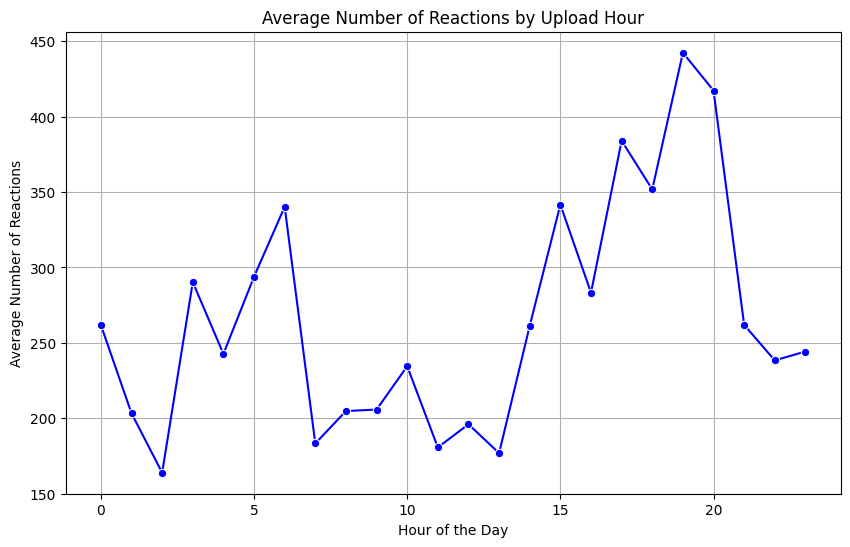

In [41]:
# Extract the hour from the 'status_published' column
df['publish_hour'] = df['status_published'].dt.hour

# Group by hour and calculate the average number of reactions
hourly_reactions = df.groupby('publish_hour')['num_reactions'].mean()

# Plotting the relationship between upload hour and average reactions
plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_reactions, marker='o', color='blue')
plt.title('Average Number of Reactions by Upload Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Reactions')
plt.grid(True)
plt.show()


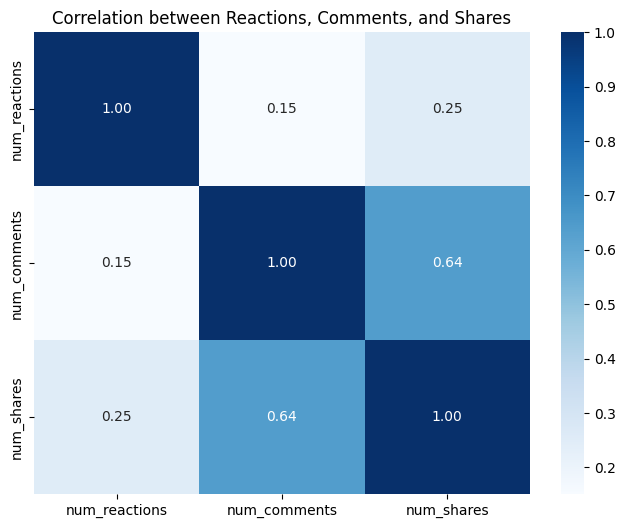

In [42]:
# Correlation analysis
correlation_matrix = df[['num_reactions', 'num_comments', 'num_shares']].corr()

# Plotting the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation between Reactions, Comments, and Shares')
plt.show()


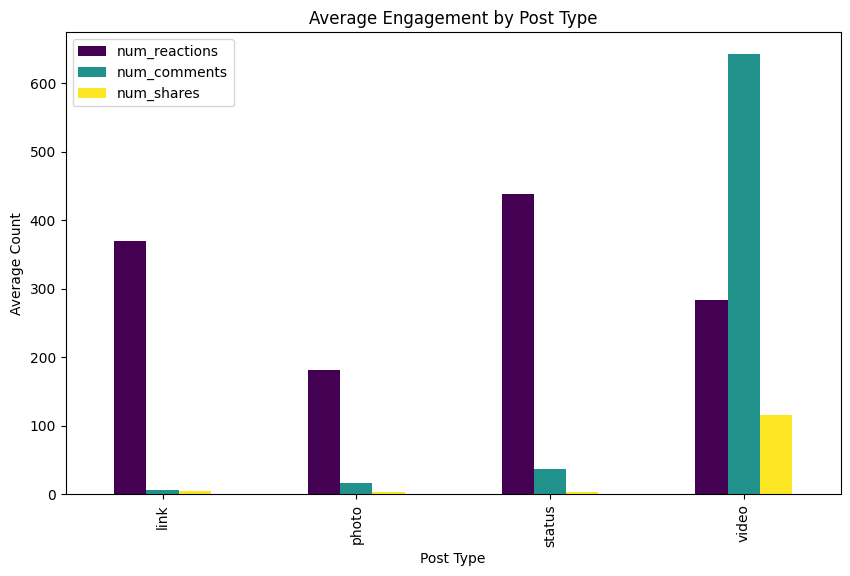

In [43]:
# Group by post type and calculate the average number of reactions, comments, and shares
post_type_stats = df.groupby('status_type')[['num_reactions', 'num_comments', 'num_shares']].mean()

# Plotting the average engagement by post type
post_type_stats.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Average Engagement by Post Type')
plt.xlabel('Post Type')
plt.ylabel('Average Count')
plt.show()


In [44]:
# Display all column names to verify the correct one
print("Column Names in Dataset:")
print(df.columns)


Column Names in Dataset:
Index(['status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys', 'Column1', 'Column2', 'Column3',
       'Column4', 'publish_hour'],
      dtype='object')


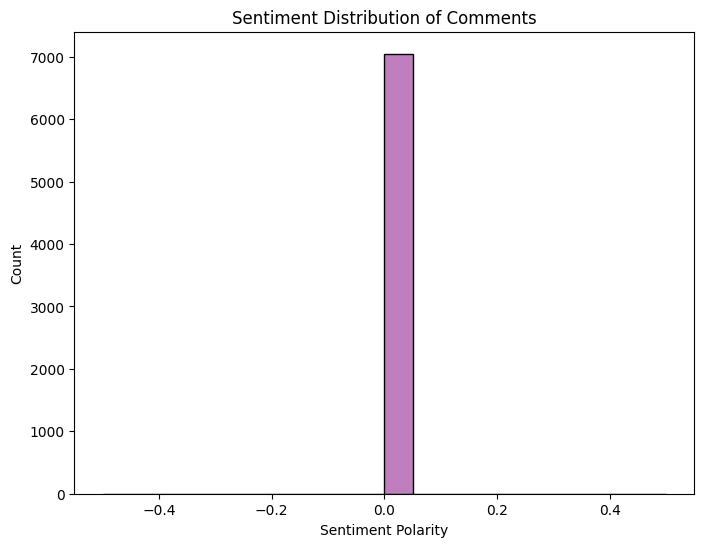

In [45]:
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

# Check if 'status_message' exists, if not, try 'status_update', otherwise use 'status_published'
column_name = 'status_message'
if column_name not in df.columns:
    column_name = 'status_update'  # Fallback to 'status_update' if 'status_message' not found
    if column_name not in df.columns:  # Check if 'status_update' also doesn't exist
        column_name = 'status_published'  # Use 'status_published' as a final fallback
        print(f"Warning: Using 'status_published' for sentiment analysis as neither 'status_message' nor 'status_update' were found.")

# Apply sentiment analysis using the determined column name
df['comment_sentiment'] = df[column_name].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Plotting the sentiment distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['comment_sentiment'], bins=20, kde=True, color='purple')
plt.title('Sentiment Distribution of Comments')
plt.xlabel('Sentiment Polarity')
plt.show()

In [46]:
# Group by post type and calculate average metrics
post_type_stats = df.groupby('status_type')[['num_reactions', 'num_comments', 'num_shares']].mean()

print("Average Reactions, Comments, and Shares by Post Type:")
print(post_type_stats)


Average Reactions, Comments, and Shares by Post Type:
             num_reactions  num_comments  num_shares
status_type                                         
link            370.142857      5.698413    4.396825
photo           181.290345     15.993470    2.553871
status          438.783562     36.238356    2.558904
video           283.409597    642.478149  115.679949


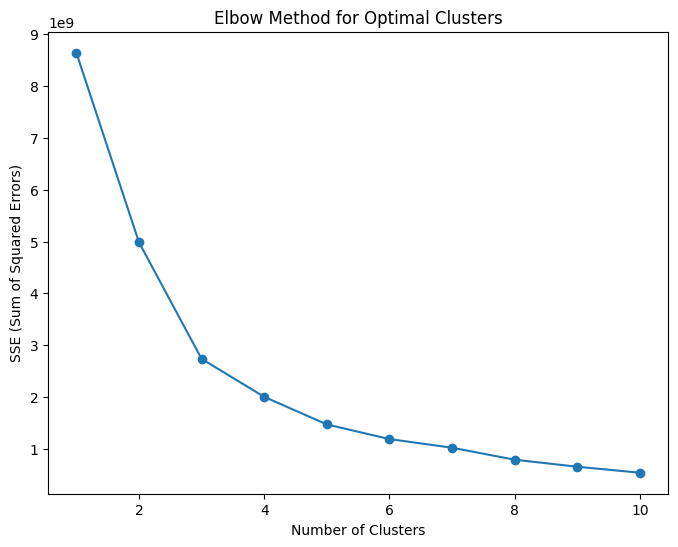

Clustering Completed!


In [47]:
from sklearn.cluster import KMeans

# Selecting columns for clustering
clustering_data = df[['num_reactions', 'num_comments', 'num_shares',
                      'num_likes', 'num_loves', 'num_wows',
                      'num_hahas', 'num_sads', 'num_angrys']]

# Determine the optimal number of clusters using the elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(clustering_data)
    sse.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.show()

# Applying K-Means clustering with the optimal number of clusters (e.g., 3)
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42).fit(clustering_data)
df['Cluster'] = kmeans.labels_

print("Clustering Completed!")


In [48]:
# Save the clustered data to a CSV file
df.to_csv('facebook_live_clusters.csv', index=False)
print("Clustered data saved as 'facebook_live_clusters.csv'")


Clustered data saved as 'facebook_live_clusters.csv'


In [49]:
# Save the extracted text to a file
with open('dataset_2_extracted.txt', 'w') as f:
    f.write(doc_text)

print("Extracted text saved as 'dataset_2_extracted.txt'")


Extracted text saved as 'dataset_2_extracted.txt'


# Sales Prediction Dataset

The dataset provided contains information about the advertising expenditures of a company on various platforms (TV, Radio, newspapers) and the corresponding sales of a product.

In [88]:
!pip install pandas statsmodels seaborn matplotlib

In [97]:
from google.colab import files
uploaded = files.upload()  # This will prompt you to select the file

Saving advertising_sales_data.xlsx to advertising_sales_data (1).xlsx


In [98]:
import pandas as pd

# Load the dataset
data = pd.read_excel("advertising_sales_data.xlsx")
data.head()  # Display the first few rows

,Campaign,TV,Radio,Newspaper,Sales
0,camp1,230.1,37.8,69.2,22.1
1,camp2,44.5,39.3,45.1,10.4
2,camp3,17.2,45.9,69.3,12.0
3,camp4,151.5,41.3,58.5,16.5
4,camp5,180.8,10.8,58.4,17.9


In [91]:
import pandas as pd

# Load the dataset
data = pd.read_excel("advertising_sales_data.xlsx")
data.head()  # Display the first few rows

,Campaign,TV,Radio,Newspaper,Sales
0,camp1,230.1,37.8,69.2,22.1
1,camp2,44.5,39.3,45.1,10.4
2,camp3,17.2,45.9,69.3,12.0
3,camp4,151.5,41.3,58.5,16.5
4,camp5,180.8,10.8,58.4,17.9


from matplotlib import pyplot as plt
_df_16['TV'].plot(kind='hist', bins=20, title='TV')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17['Radio'].plot(kind='hist', bins=20, title='Radio')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18['Newspaper'].plot(kind='hist', bins=20, title='Newspaper')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19['Sales'].plot(kind='hist', bins=20, title='Sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_20.groupby('Campaign').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_21.plot(kind='scatter', x='TV', y='Radio', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_22.plot(kind='scatter', x='Radio', y='Newspaper', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_23.plot(kind='scatter', x='Newspaper', y='Sales', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_24['TV'].plot(kind='line', figsize=(8, 4), title='TV')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_25['Radio'].plot(kind='line', figsize=(8, 4), title='Radio')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_26['Newspaper'].plot(kind='line', figsize=(8, 4), title='Newspaper')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_27['Sales'].plot(kind='line', figsize=(8, 4), title='Sales')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_28['Campaign'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_28, x='TV', y='Campaign', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_29['Campaign'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_29, x='Radio', y='Campaign', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_30['Campaign'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_30, x='Newspaper', y='Campaign', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_31['Campaign'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_31, x='Sales', y='Campaign', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [92]:
average_tv = data['TV'].mean()
print(f"Average TV Advertising Expenditure: {average_tv}")

Average TV Advertising Expenditure: 147.0425


In [93]:
correlation_radio_sales = data['Radio'].corr(data['Sales'])
print(f"Correlation between Radio Advertising and Sales: {correlation_radio_sales}")

Correlation between Radio Advertising and Sales: 0.3497277129207837


In [94]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

# Load the dataset
data = pd.read_excel("advertising_sales_data.xlsx")

# Replace infinite values with NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with any missing values
data.dropna(inplace=True)

# Define independent and dependent variables
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

# Add a constant to the independent variables
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     601.4
Date:                Tue, 01 Apr 2025   Prob (F-statistic):           6.01e-98
Time:                        06:59:00   Log-Likelihood:                -380.12
No. Observations:                 198   AIC:                             768.2
Df Residuals:                     194   BIC:                             781.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6343      0.309     15.008      0.0

In [95]:
!pip install python-docx

In [96]:
from google.colab import files
uploaded = files.upload()

Saving Sales Prediction Dataset.docx to Sales Prediction Dataset (2).docx


In [99]:
from docx import Document

# Load the document
doc = Document("Sales Prediction Dataset.docx")
content = []
for paragraph in doc.paragraphs:
    content.append(paragraph.text)

# Display content
for line in content:
    print(line)

Sales Prediction Dataset
The dataset provided contains information about the advertising expenditures of a company on various platforms (TV, Radio, newspapers) and the corresponding sales of a product. Here's an explanation of the dataset:

1. TV: This column represents the amount of money spent on advertising the product on television. TV advertising is a traditional and widely used medium for reaching a broad audience.

2. Radio: This column indicates the advertising expenditure on radio. Radio advertising is known for its ability to target specific demographics and local audiences.

3. Newspaper: This column shows the advertising cost spent on newspaper advertising. Newspaper advertising is often used for targeting specific geographic regions or demographics.

4. Sales: This column represents the number of units sold corresponding to the advertising expenditures on TV, Radio, and newspapers.

Questions:
What is the average amount spent on TV advertising in the dataset?
What is the c

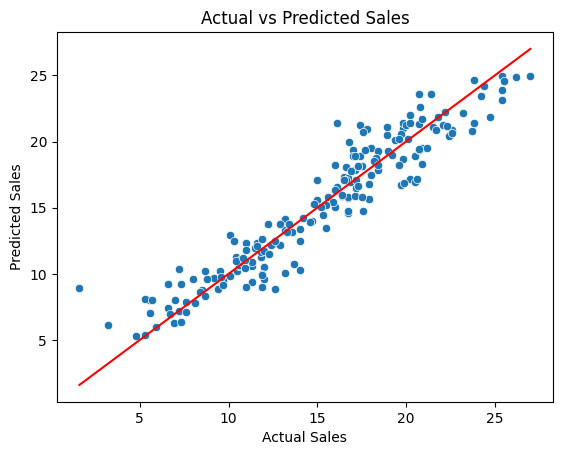

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

predictions = model.predict(X)
sns.scatterplot(x=data['Sales'], y=predictions)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.plot([min(data['Sales']), max(data['Sales'])], [min(data['Sales']), max(data['Sales'])], color='red')
plt.show()

In [107]:
import pandas as pd
import statsmodels.api as sm

# Example training data (replace this with your actual training data)
data = pd.DataFrame({
    'TV': [100, 150, 200, 250, 300],
    'Radio': [20, 25, 30, 35, 40],
    'Newspaper': [10, 15, 20, 25, 30],
    'Sales': [50, 60, 70, 80, 90]
})

# Features (X) and target variable (y)
X = data[['TV', 'Radio', 'Newspaper']]  # Features
y = data['Sales']  # Target variable

# Add constant to X for the intercept term
X = sm.add_constant(X)

# Train the model
model = sm.OLS(y, X).fit()

# New input data for prediction (replace this with actual new data)
new_data = pd.DataFrame({'TV': [200], 'Radio': [40], 'Newspaper': [50]})

# Manually add constant to new data (to match the model's requirement)
new_data['const'] = 1  # Add a constant column manually

# Ensure the columns of new_data match the model's X columns (constant + features)
new_data = new_data[['const', 'TV', 'Radio', 'Newspaper']]  # Reorder columns to match

# Make prediction
predicted_sales = model.predict(new_data)

# Print the predicted sales
print(f"Predicted Sales for the new expenditures: {predicted_sales[0]}")


Predicted Sales for the new expenditures: 99.4138404234464


In [108]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Normalizing the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[['TV', 'Radio', 'Newspaper']])
X_train, X_test, y_train, y_test = train_test_split(scaled_features, data['Sales'], test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error after normalization: {mse}")

Mean Squared Error after normalization: 0.0


In [109]:
X_reduced = data[['Radio', 'Newspaper']]
model_reduced = sm.OLS(y, sm.add_constant(X_reduced)).fit()
print(model_reduced.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.952e+30
Date:                Tue, 01 Apr 2025   Prob (F-statistic):           2.00e-46
Time:                        07:08:54   Log-Likelihood:                 153.61
No. Observations:                   5   AIC:                            -303.2
Df Residuals:                       3   BIC:                            -304.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3922   4.58e-16   8.57e+14      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [111]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X_vif = add_constant(data[['TV', 'Radio', 'Newspaper']])
vif = pd.DataFrame()
vif["Variable"] = X_vif.columns
vif["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
print(vif)


    Variable  VIF
0      const  0.0
1         TV  inf
2      Radio  inf
3  Newspaper  inf


/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


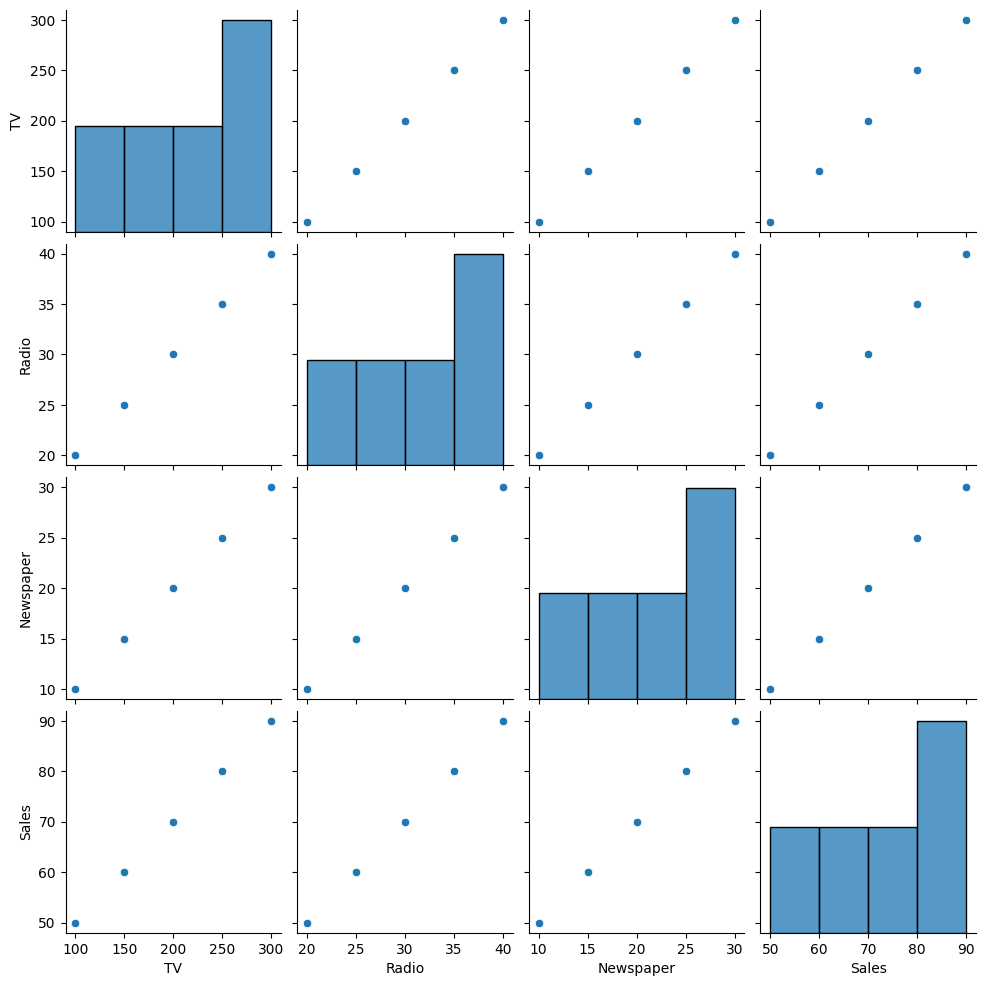

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data[['TV', 'Radio', 'Newspaper', 'Sales']])
plt.show()


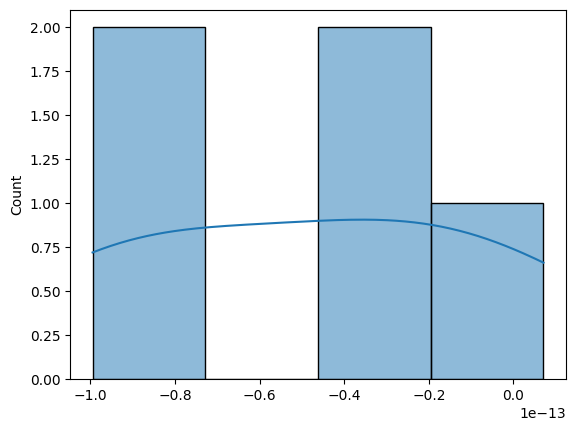

In [114]:
residuals = model_combined.resid
sns.histplot(residuals, kde=True)
plt.show()


In [115]:
print(model_combined.t_test([0, 1, 0, 0]))  # Hypothesis test for TV coefficient


                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            -0.0961   1.54e-15  -6.22e+13      0.000      -0.096      -0.096


In [117]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_combined, y)
print("Ridge Model Coefficients:", ridge_model.coef_)


Ridge Model Coefficients: [0.         0.19607074 0.01960707 0.01960707]


In [113]:
data['TV_Radio_Interaction'] = data['TV'] * data['Radio']
X_interaction = data[['TV', 'Radio', 'Newspaper', 'TV_Radio_Interaction']]
X_interaction = sm.add_constant(X_interaction)
model_interaction = sm.OLS(y, X_interaction).fit()
print(model_interaction.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.631e+26
Date:                Tue, 01 Apr 2025   Prob (F-statistic):           1.51e-27
Time:                        07:12:44   Log-Likelihood:                 134.06
No. Observations:                   5   AIC:                            -262.1
Df Residuals:                       2   BIC:                            -263.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2980 

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
